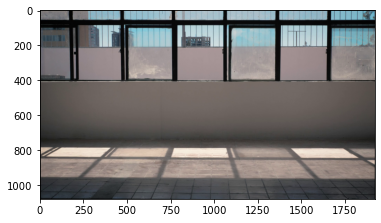

(240, 195, 3)


In [38]:
import cv2
import re
import os
import random
import numpy as np
import matplotlib.pyplot as plt
from os.path import isfile, join


logo=cv2.imread(r"C:\Users\aryen\Downloads\download.jpg")
cap=cv2.VideoCapture(r"C:\Users\aryen\Desktop\Pexels Videos 2675513.mp4")
ret, frame=cap.read()

#frame.shape
plt.imshow(logo)
plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))
plt.show()
logo=cv2.resize(logo,(195,240))
print(logo.shape)

In [39]:
lower=np.array([6,10,68])
upper=np.array([30,36,122])
kernel=np.ones((3,3),np.uint8)
cap=cv2.VideoCapture(r"C:\Users\aryen\Desktop\Pexels Videos 2675513.mp4")
cnt=0
while True:
    ret,f=cap.read()
    mini_frame=f[500:740,875:1070,:]
    hsv=cv2.cvtColor(f,cv2.COLOR_BGR2HSV)
    mask=cv2.inRange(hsv,lower,upper)
    dil=cv2.dilate(mask,kernel,iterations=5)
    mini_dil=np.zeros_like(mini_frame)
    mini_dil[:,:,0]=dil[500:740,875:1070]
    mini_dil[:,:,1]=dil[500:740,875:1070]
    mini_dil[:,:,2]=dil[500:740,875:1070]
    logo_copy=logo.copy()
    logo_copy[mini_dil==0]=1
    logo_copy[logo==0]=1
    mini_frame[logo_copy !=1]=1
    mini_frame=mini_frame*logo_copy
    f[500:740,875:1070,:]=mini_frame
    f=cv2.resize(f,(480,270),interpolation=cv2.INTER_AREA)
    cv2.imshow('frame',f)
    cnt+=1
    if cv2.waitKey(20) & 0xFF ==ord('q'):
        cv2.destroyAllWindows()
        break